APPLICATION MLP IN DIGITS RECOGNATION

Importation des bibliothèques nécessaires

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


chargement de la base de données MNIST

diviser les données à deux parties training data & testing data 

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2 	 1 




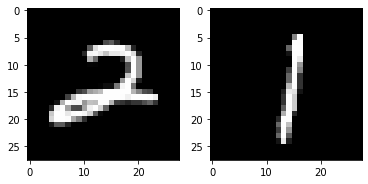

In [83]:
randindices=np.random.randint(x_train.shape[0],size=2)
print(y_train[randindices[0]],'\t',y_train[randindices[1]],'\n\n')
plt.figure()
plt.subplot(1,2,1)
plt.imshow(x_train[randindices[0],:,:],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(x_train[randindices[1],:,:],cmap='gray')

Data préprocessing

Aplatir les images et normalisation

In [19]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [27]:
nbr_classes = 10
y_train =to_categorical(y_train, nbr_classes)
y_test =to_categorical(y_test, nbr_classes)

# Entrainement de notre modèle MLP

Conception notre MLP

In [28]:
model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(784,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(nbr_classes, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 250)               196250    
                                                                 
 dense_5 (Dense)             (None, 250)               62750     
                                                                 
 dense_6 (Dense)             (None, 250)               62750     
                                                                 
 dense_7 (Dense)             (None, 10)                2510      
                                                                 
Total params: 324,260
Trainable params: 324,260
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

In [31]:
batch_size = 120
epochs = 12

In [32]:
result = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/12
500/500 [==============================] - 5s 8ms/step - loss: 0.2476 - accuracy: 0.9262 - val_loss: 0.1395 - val_accuracy: 0.9575
Epoch 2/12
500/500 [==============================] - 4s 8ms/step - loss: 0.0909 - accuracy: 0.9726 - val_loss: 0.0992 - val_accuracy: 0.9700
Epoch 3/12
500/500 [==============================] - 4s 8ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0761 - val_accuracy: 0.9766
Epoch 4/12
500/500 [==============================] - 4s 8ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.0698 - val_accuracy: 0.9793
Epoch 5/12
500/500 [==============================] - 4s 8ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0751 - val_accuracy: 0.9776
Epoch 6/12
500/500 [==============================] - 4s 8ms/step - loss: 0.0271 - accuracy: 0.9908 - val_loss: 0.0919 - val_accuracy: 0.9736
Epoch 7/12
500/500 [==============================] - 4s 8ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0780 - val_accuracy: 0.9798
Epoch 

In [33]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9782000184059143


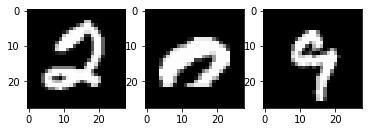

In [34]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)),cmap='gray')

In [50]:
predictions=model.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une probabilité de ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une probabilité de ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une probabilité de ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

Le réseau reconnaît le chiffre 2 avec une probabilité de 100.0%.
Le réseau reconnaît le chiffre 0 avec une probabilité de 98.12598824501038%.
Le réseau reconnaît le chiffre 9 avec une probabilité de 99.75354671478271%.


********************************************************************************************************************************************************************************************************************************************************

## Interface graphique (deploy modele)

In [101]:
###################################################
import numpy as np
import tkinter as tk
from tkinter import *
from keras.models import load_model 
from PIL import ImageTk,Image,ImageDraw,ImageOps
import cv2
import random as rand

Creation d'interface graphique pour écrire manuellement et prédire les chiffres de 0 à 9

In [107]:
#create and configure window
window=tk.Tk()
window.geometry("670x500")
window.title('Digit Recognition')
window['bg']='lightseagreen'
window.iconbitmap('C:\\Users\\ADMIN\\Downloads\\head-brains_icon-icons.com_53022.ico')
#fix the size of window
window.resizable(0,0)

#upload mlp model in variable mod
mod=load_model('mlp.h5')

#functions definition
def clear():
 global img,img_draw
 canva.delete('all')
 img=Image.new('RGB',(400,400),(0,0,0))
 img_draw=ImageDraw.Draw(img)
 label_result.config(text='')
 label_proba.config(text='')
def paint(event):
 x1, y1 = (event.x - 7), (event.y -7)
 x2, y2 = (event.x + 7), (event.y +7)
 canva.create_oval(x1, y1, x2, y2, fill="black",width=10)
 img_draw.ellipse((x1, y1, x2, y2), fill='white')

#recognize function definition
def recognize():
 #img.show()
 img_array=np.array(img)
 img_array=cv2.resize(img_array,(28,28))
 img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
 img_array=img_array/255
 img_array=img_array.reshape(1,784)
 resultat=mod.predict(img_array)
 label_result.config(text=str(np.argmax(resultat)))
 label_proba.config(text=str(round(np.max(resultat)*100))+'%')
#create and configure canva and labels,buttons
canva=tk.Canvas(master=window,height=400,width=400,bg = "white",cursor="pencil")
label1=tk.Label(window,text="Predicted Digit",font=("Helvetica",12),bg='lightseagreen',foreground='white')
label2=tk.Label(window,text="Confidence",font=("Helvetica",12),bg='lightseagreen',foreground='white')
label_result=tk.Label(window,text="",height=2,width=10,font=("Helvetica",12),bg='orange',foreground='black')
label_proba=tk.Label(window,text="",height=2,width=10,font=("Helvetica",12),bg='orange',foreground='black')
classify_btn = tk.Button(window,text = "Recognise",height=2,width=20,bg='#3ea744',foreground="white",
font=('Helvatical bold',10,'bold'),highlightbackground="lightseagreen",command=recognize) 
button_clear = tk.Button(window, text = "Clear",height=2,width=20,bg='#3ea744',foreground="white",
font=('Helvatical bold',10,'bold'),highlightbackground="lightseagreen",command=clear)
#configure widgets
canva.grid(row=0, column=0, pady=2, sticky=W)
label1.place(x=420,y=180)
label2.place(x=565,y=180)
label_result.place(x=428,y=210)
label_proba.place(x=560,y=210)
button_clear.place(x=230,y=430)
classify_btn.place(x=10,y=430)
canva.bind( "<B1-Motion>", paint )
#create image for drawing digit manually
img=Image.new('RGB',(400,400),(0,0,0))
img_draw=ImageDraw.Draw(img)
#make window interactive with user
window.mainloop()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------********************************************************************************************************************************************************************************************************************************************************

Inerface graphique pour prédire les chiffres existant dans les données de test

In [108]:
#loading mnist data and take primary digit in testing data,resizing image for make it it fit with the canvas size. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
randindices=np.random.randint(x_test.shape[0],size=10000)
imge=(x_test[randindices[0],:,:])
img_array=np.array(imge)
img_array=cv2.resize(img_array,(400,400))
imge=Image.fromarray(img_array)
#uploading ml model
mod=load_model('mlp.h5')
#function definition
#upl function for put data test images in canvas
def upl():
 global imge
 imge = ImageTk.PhotoImage(imge)
 canva.create_image(0,0,anchor=NW,image=imge)
#for prediction
def recognize():
 global img_array
 img_array=cv2.resize(img_array,(28,28))
 img_array=img_array/255
 img_array=img_array.reshape(1,784)
 resultat=mod.predict(img_array)
 label_result.config(text=str(np.argmax(resultat)))
 label_proba.config(text=str(round(np.max(resultat)*100))+'%')
#clearing canvas and take another digit from testing data
def clear():
 global imge,img_array
 canva.delete('all')
 label_result.config(text='')
 label_proba.config(text='')
 imge=(x_test[randindices[rand.randint(1,999)],:,:])
 img_array=np.array(imge)
 img_array=cv2.resize(img_array,(400,400))
 imge=Image.fromarray(img_array)
#create window for application   
window=tk.Tk()
window.geometry("670x500")
window.title('Digit Recognition')
window['bg']='lightseagreen'
window.iconbitmap('C:\\Users\\ADMIN\\Downloads\\head-brains_icon-icons.com_53022.ico')
#fix the size of window
window.resizable(0,0)
#create widgets
canva=tk.Canvas(master=window,height=400,width=400,bg = "white",cursor="pencil")
label1=tk.Label(window,text="Predicted Digit",font=("Helvetica",12),bg='lightseagreen',foreground='white')
label2=tk.Label(window,text="Confidence",font=("Helvetica",12),bg='lightseagreen',foreground='white')
label_result=tk.Label(window,text="",height=2,width=10,font=("Helvetica",12),bg='orange',foreground='black')
label_proba=tk.Label(window,text="",height=2,width=10,font=("Helvetica",12),bg='orange',foreground='black')
classify_btn = tk.Button(window,text = "Upload digit",height=2,width=20,bg='#3ea744',foreground="white",
font=('Helvatical bold',10,'bold'),highlightbackground="lightseagreen",command=upl) 
button_clear = tk.Button(window, text = "Recognize",height=2,width=20,bg='#3ea744',foreground="white",
font=('Helvatical bold',10,'bold'),highlightbackground="lightseagreen",command=recognize)
button_upl=tk.Button(window, text = "Clear",height=2,width=20,bg='#3ea744',foreground="white",
font=('Helvatical bold',10,'bold'),highlightbackground="lightseagreen",command=clear)
#configure widgets
canva.grid(row=0, column=0, pady=2, sticky=W)
label1.place(x=420,y=180)
label2.place(x=565,y=180)
label_result.place(x=428,y=210)
label_proba.place(x=560,y=210)
button_clear.place(x=230,y=430)
button_upl.place(x=450,y=430)
classify_btn.place(x=10,y=430)
#make window interactive
window.mainloop()